Este colab fue desarrollado por Arnold Charry Armero.

# El Modelo EPQ sin faltantes (Economic Production Quantity)

El modelo EPQ sin faltantes es una extensión directa del modelo EPQ original. El cambio más importante en este nuevo modelo es que la cantidad de faltantes debe de ser nula. Por lo tanto, se toma una política de satisfacer la demanda de manera que no se incurra en órdenes tardías. Esto impacta de manera significativa el modelo, ya que se debe de mantener un inventario mayor para tener la capacidad de satisfacer en todo momento las necesidades del cliente.

**Supuestos:**

*   Existe un solo producto en el sistema de inventarios
*   La demanda es uniforme y determinística
*   No se permiten faltantes
*   No hay un tiempo de entrega
*   Tasa de reabastecimiento finita, es decir, después de cierto tiempo el inventario se llena.


La geometría del inventario de este modelo es la siguiente,

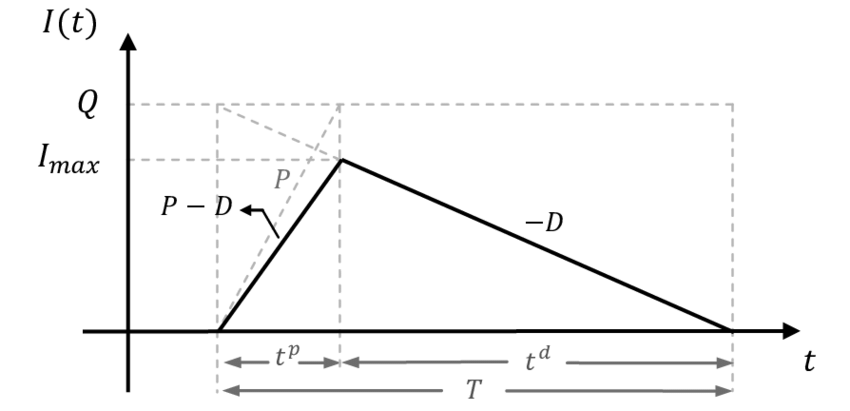

Matemáticamente, el modelo se expresa de la siguiente manera:

$$ K(Q)= cD + \frac{AD}{Q}+\frac{hQ}{2} \left ( 1 - \frac{D}{\psi } \right ) $$

donde,

$ Q = \mathrm{Cantidad \:de \: lote \: a \: producir} $

$ c = \mathrm{Costo \: unitario \: de \: compra} $

$ D = \mathrm{Tasa \:de \: demanda} $

$ \psi = \mathrm{Tasa \:de \: producción} $

$ A = \mathrm{Costo \:unitario \: de \: ordenar} $

$ h = \mathrm{Costo \:unitario \: de \: mantener \: en \: inventario} $

$ K = \mathrm{Costo \: total \: promedio} $

Para saber la cantidad óptima de lote a ordenar, se debe derivar la función e igualar a 0. Matemáticamente se expresa esto de la siguiente manera,

$$ \frac{dK(Q)}{dQ}= -\frac{AD}{Q^{2}}+\frac{h}{2} \left ( 1 - \frac{D}{\psi } \right )=0 $$

Despejando $Q$,

$$ Q^{*} = \sqrt{\frac{2AD}{h \left ( 1 - \frac{D}{\psi } \right )}} $$



Esta formula nos indica cuánto se debe ordenar con el fin de minimizar los costos de inventario. Ahora se continua con la implementación en código resolviendo el siguiente ejemplo.

**Ejemplo 6-4. Lote económico de producción.** La compañía Rainbow Paint Manufacturing tiene
una variada línea de productos. Uno de ellos es la pintura de látex. Rainbow puede fabricar pintura a
una tasa anual de 8000 galones para satisfacer una demanda de 4000 galones al año. El costo unitario de producir un galón de pintura es $\$0.25$ y el costo
anual de mantener el inventario es $40$%. Antes de cada corrida de producción se realiza la limpieza y
verificación de las operaciones a un costo de $\$25$. Analice este problema.

In [1]:
#Se importan las librerias
import scipy.optimize as optimize
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Se definen los parámetros.
c = 0.25
D = 4000
P = 8000
A = 25
i = 0.4
h = i * c

In [3]:
#Se define la función
def K(Q):
  """
  Calcula el costo total promedio tomando en
  cuenta el tamaño de lote Q ingresado

  Args:
    Q: Tamaño de lote seleccionado.

  Returns:
    K: Costo total promedio
  """
  return c*D + (A*D)/ Q + h*(Q/2)*(1 - (D/P))

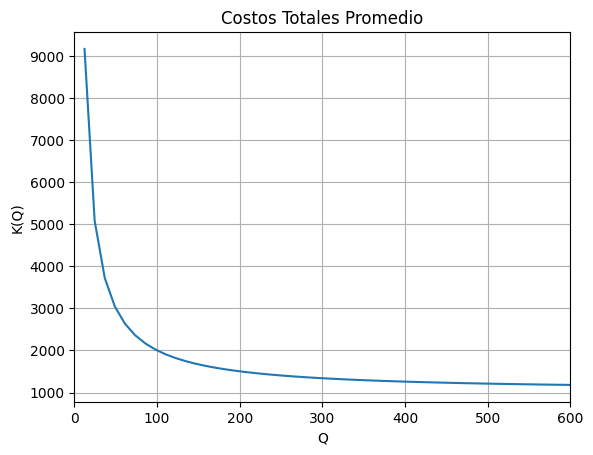

In [7]:
#Se grafica la función para entender mejor su comportamiento
x = np.linspace(0, 600)
y = [K(Q) for Q in x]
plt.grid()
plt.title("Costos Totales Promedio")
plt.xlim(0, 600)
plt.xlabel('Q')
plt.ylabel('K(Q)')
plt.plot(x, y)

Para optimizar, se verán dos formas. La primera, es utilizando algoritmos de optimización que sirven para cualquier función. La segunda, es utilizando la formula del $Q^{*}$ optimizado.

Para cualquier función de una o varias variables,

In [8]:
#Q inicial para la optimización
q0 = 50

#Optimización
result = optimize.minimize(K, q0, options={"disp": True}, method = 'SLSQP')
result

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1100.0000007321655
            Iterations: 19
            Function evaluations: 39
            Gradient evaluations: 19


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1100.0000007321655
       x: [ 2.000e+03]
     nit: 19
     jac: [ 0.000e+00]
    nfev: 39
    njev: 19

In [9]:
#Valor de Q optimizado
optimized_Q = result.x[0]
print("El tamaño de lote debe de ser de {} unidades".format(optimized_Q))

El tamaño de lote debe de ser de 2000.2420337494182 unidades


In [10]:
#Valor de K optimizado - Costo Optimizado
optimized_K = result.fun
print("El costo total minimizado es de ${}".format(optimized_K))

El costo total minimizado es de $1100.0000007321655


Empleando la formula obtenida,

In [12]:
#Optimización - Q unidades
def optimized_formula_EPQ_without_shortages(c, D, A, i, P):
  return np.sqrt((2 * A * D) / ((c * i) * (1 - (D/P))))

print("El tamaño de lote debe de ser de {} unidades".format(optimized_formula_EPQ_without_shortages(0.25, 4000, 25, 0.4, 8000)))

El tamaño de lote debe de ser de 2000.0 unidades


In [13]:
#Valor de K optimizado - Costo Optimizado
def EPQ_function_without_shortages(c, D, A, i, P, Q):
  """
  Calcula el costo total promedio tomando en
  cuenta el tamaño de lote Q ingresado

  Args:
    c: Costo unitario del producto
    D: Tasa de Demanda
    A: Costo unitario de ordenar
    el producto
    i: Porcentaje de mantener en
    inventario
    P: Tasa de Producción
    Q: Tamaño de lote seleccionado.

  Returns:
    K: Costo total promedio
  """
  if Q == 0:
    return np.inf
  h = i * c #Costo de mantener el inventario
  return c*D + (A*D)/ Q + h*(Q/2)*(1 - (D/P))

print("El costo total minimizado es de ${}".format(EPQ_function_without_shortages(0.25, 4000, 25, 0.4, 8000, 2000)))

El costo total minimizado es de $1100.0


Otra forma de optimizar con código sería la siguiente,

In [14]:
Q = [50]

def total_cost(Q):
  cost = 0
  for i in range(0, len(Q)):
    cost += EPQ_function_without_shortages(0.25, 4000, 25, 0.4, 8000, Q)
  return cost

In [15]:
result = optimize.basinhopping(total_cost, Q, minimizer_kwargs = {"method": "BFGS"}, niter = 100)
result

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 1100.000000000033
                          x: [ 2.000e+03]
                        nit: 100
      minimization_failures: 2
                       nfev: 920
                       njev: 448
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 1100.000000000033
                                    x: [ 2.000e+03]
                                  nit: 0
                                  jac: [ 0.000e+00]
                             hess_inv: [[1]]
                                 nfev: 2
                                 njev: 1

In [16]:
#Valor de Q optimizado
optimized_Q = result.x[0]
print("El tamaño de lote debe de ser de {} unidades".format(optimized_Q))

El tamaño de lote debe de ser de 1999.9983741883575 unidades


In [17]:
#Valor de K optimizado - Costo Optimizado
optimized_K = result.fun
print("El costo total minimizado es de ${}".format(optimized_K))

El costo total minimizado es de $1100.000000000033


Cuando el costo de ordenar y el costo de mantener el inventario se igualan, se obtiene el mínimo costo. Se observa en la siguiente gráfica:

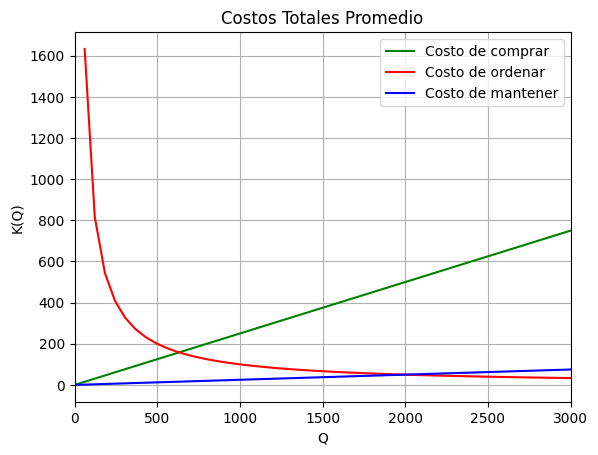

In [19]:
def K1(Q):
  return c*Q
def K2(Q):
  return (A*D)/ Q
def K3(Q):
  return h*(Q/2)*(1 - (D/P))
x = np.linspace(0, 3000)
y1 = [K1(Q) for Q in x]
y2 = [K2(Q) for Q in x]
y3 = [K3(Q) for Q in x]
plt.grid()
plt.title("Costos Totales Promedio")
plt.xlim(0, 3000)
plt.xlabel('Q')
plt.ylabel('K(Q)')
plt.plot(x, y1, color = "green", label = "Costo de comprar")
plt.plot(x, y2, color = "red", label = "Costo de ordenar")
plt.plot(x, y3, color = "blue", label = "Costo de mantener")
plt.legend(loc = 'best')
plt.show()

#### Referencias


*   Chopra, S., & Meindl, P. (2016). Supply chain management: Strategy, planning, and operation, global edition (6th ed.). Pearson Education.
*   Sipper, D., & Bulfin, R. L. (1998). Planeación y control de la producción.
*   Zill, D. G. (2000). Cálculo de una variable: trascendentes tempranas (4a. ed.).